#### Libraries

In [99]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
import pickle 
import streamlit as st

In [53]:
df=pd.read_csv('twitter_training.csv',encoding='latin-1')
df.head


<bound method NDFrame.head of          ID         Name    Review  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                    Text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window p

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab') # 'punkt' — the tokenizer model NLTK uses.
stop_words=set(stopwords.words('english'))
nltk.download('wordnet') #lemmatizer tool used this dataset to function


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


True

#### Text Preprocessing

In [65]:
lemmatizer=WordNetLemmatizer()
def preprocess_text(text):
   if not isinstance(text,str):
      return ""
   
    # 1. Lowercasing
   text= text.lower() 
     #2. Tokenization: Split text into words
   words=nltk.word_tokenize(text)

   # 3. Removing Punctuation
   words=[word for word in words if word not in string.punctuation]
    
    #4 Stop words removal 
   words=[word for word in words if word not in stop_words]
   
   #5  Lemmatization (or Stemming): Convert words to their base form
   words=[lemmatizer.lemmatize(word) for word in words]

   #6   Join words back into a single string
   return " ".join(words)
   

In [66]:
df['cleaned_text']=df['Text'].apply(preprocess_text)
df['cleaned_text'].head()

0                coming border kill
1        im getting borderland kill
2       im coming borderland murder
3    im getting borderland 2 murder
4      im getting borderland murder
Name: cleaned_text, dtype: object

#### Feature Engineering

In [88]:
tfidf=TfidfVectorizer(max_features=50000)
X=tfidf.fit_transform(df['cleaned_text'])

#Labels
y=df['Review'].values

# Splitting the datset into training and testing sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#### Model Training

In [90]:
model=LogisticRegression()
model.fit(X_train,y_train)

#Evaluate 
y_pred=model.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score 0.7705027783356765
Classification Report               precision    recall  f1-score   support

  Irrelevant       0.81      0.65      0.72      2661
    Negative       0.79      0.83      0.81      4471
     Neutral       0.72      0.76      0.74      3551
    Positive       0.78      0.79      0.78      4254

    accuracy                           0.77     14937
   macro avg       0.77      0.76      0.76     14937
weighted avg       0.77      0.77      0.77     14937



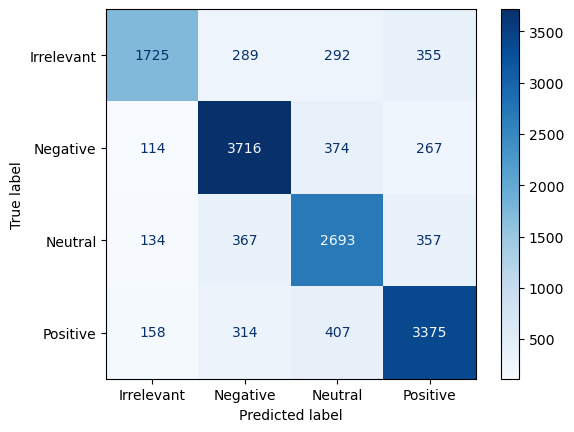

In [92]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Display it
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='Blues')

#### Save the model and Vectorizer

In [95]:
# save model
pickle.dump(model,open('sentiment_model.pkl','wb'))

# save vectorizer
pickle.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))